<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/PandasAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install -qU openai pandasai

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.14.0 which is incompatible.


In [9]:
!pip install ipython==7.34.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached ipython-7.34.0-py3-none-any.whl (793 kB)
  Attempting uninstall: ipython
    Found existing installation: ipython 8.14.0
    Uninstalling ipython-8.14.0:
      Successfully uninstalled ipython-8.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandasai 0.6.2 requires ipython<9.0.0,>=8.13.1, but you have ipython 7.34.0 which is incompatible.


In [1]:
import pandas as pd
import pandasai as pdai
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
from pandasai.llm.starcoder import Starcoder
from pandasai.llm.open_assistant import OpenAssistant
from pandasai.llm.google_palm import GooglePalm

In [2]:
from google.colab import files
files.upload()

Saving training_data_th_29_05_2023.csv to training_data_th_29_05_2023.csv


{'training_data_th_29_05_2023.csv': b'FormattedID,TotalTCsExclDropped,TCPercentageQuality,Is_delay,Blocked_Ratio,Failure_Ratio,Time_Elapsed,Execution_rate,Sev_1_DTE,Sev_2_DTE,Sev_3_DTE,DTE_Mean_Age,Age,num_def_map_ID,Defect_Count,SS_Ratio,TS_Ratio,Open_Count,Open_Count_MH,Defect_per_TC,reg_per_fmt_count,Is_regression_ratio,Execution_Linearity,Sev_1_MEAN,Sev_2_MEAN,Sev_3_MEAN,Total_Sev_map_ID\nF30971,59.0,95.0,1,0.0,0.0508474576271186,261,0.2260536398467433,0.0,0.0,0.0,0.0,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0169491525423728,0.0,0.0,0.0,0.0,0.0,6.0,1.0\nF31573,64.0,97.0,1,0.0,0.03125,185,0.3459459459459459,0.0,1.0,0.0,18.666666666666668,27.53846153846154,34.0,13.0,0.4615384615384615,0.0,2.0,0.0,0.203125,0.0,0.0,0.0,0.0,9.5,38.0,5.0\nF42185,104.0,98.0,1,0.0,0.0192307692307692,205,0.5073170731707317,0.0,1.0,0.0,18.666666666666668,27.53846153846154,34.0,13.0,0.4615384615384615,0.0,2.0,0.0,0.125,0.0,0.0,0.0,0.0,9.5,38.0,5.0\nF42398,166.0,96.0,1,0.0,0.0421686746987951,219,0.7579908675799086,0.0,3.

## Instantiate LLM

In [3]:
from getpass import getpass
OPENAI_API_KEY = getpass()
#
llm = OpenAI(api_token=OPENAI_API_KEY)

··········


##  Instantiate PandasAI with the provided large language model and we run

In [4]:
pandas_ai = PandasAI(llm)

In [5]:
df = pd.read_csv("/content/training_data_th_29_05_2023.csv")
df.head()

,FormattedID,TotalTCsExclDropped,TCPercentageQuality,Is_delay,Blocked_Ratio,Failure_Ratio,Time_Elapsed,Execution_rate,Sev_1_DTE,Sev_2_DTE,...,Open_Count,Open_Count_MH,Defect_per_TC,reg_per_fmt_count,Is_regression_ratio,Execution_Linearity,Sev_1_MEAN,Sev_2_MEAN,Sev_3_MEAN,Total_Sev_map_ID
0,F30971,59.0,95.0,1,0.0,0.050847,261,0.226054,0.0,0.0,...,0.0,0.0,0.016949,0.0,0.0,0.0,0.0,0.0,6.000000,1.0
1,F31573,64.0,97.0,1,0.0,0.031250,185,0.345946,0.0,1.0,...,2.0,0.0,0.203125,0.0,0.0,0.0,0.0,9.5,38.000000,5.0
2,F42185,104.0,98.0,1,0.0,0.019231,205,0.507317,0.0,1.0,...,2.0,0.0,0.125000,0.0,0.0,0.0,0.0,9.5,38.000000,5.0
3,F42398,166.0,96.0,1,0.0,0.042169,219,0.757991,0.0,3.0,...,0.0,0.0,0.042169,0.0,0.0,0.0,0.0,19.2,9.000000,4.0
4,F54898,198.0,98.0,1,0.0,0.015152,454,0.436123,0.0,5.0,...,5.0,0.0,0.186869,0.0,0.0,0.0,9.0,20.5,40.217391,13.0


In [6]:
pandas_ai.run(df, prompt="Is there a delay associated with the FormattedID F54898 ?")

No code found in the response


'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo code found in the response\n'

In [7]:
pandas_ai.run(df, prompt="What is the Failure_Ratio associated with the FormattedID F54898 ?")

0.0151515151515151

<Axes: xlabel='Is_delay', ylabel='count'>

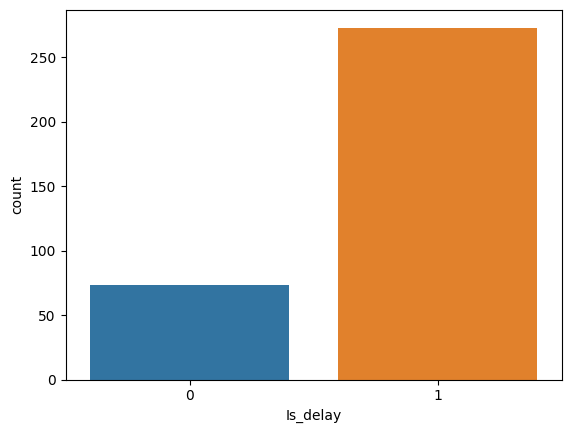

In [11]:
%matplotlib inline
pandas_ai.run(df, "Plot the countplot of Is_delay feature")

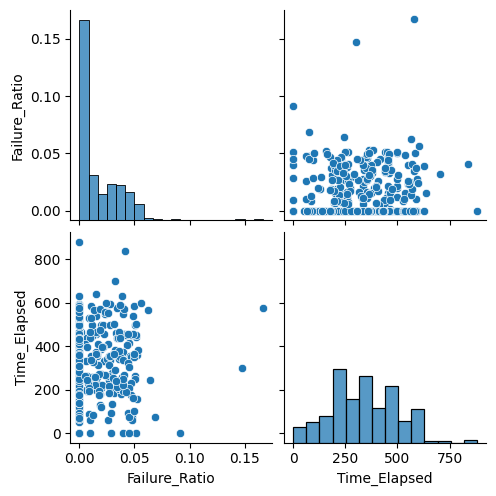

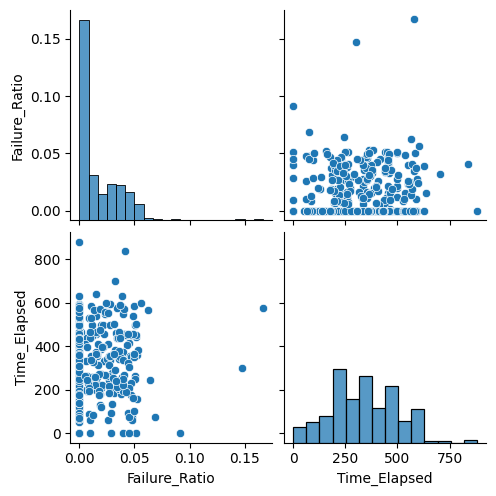

In [12]:
pandas_ai.run(df, "Plot the corelation plot between  Failure_Ratio and Time_Elapsed feature")

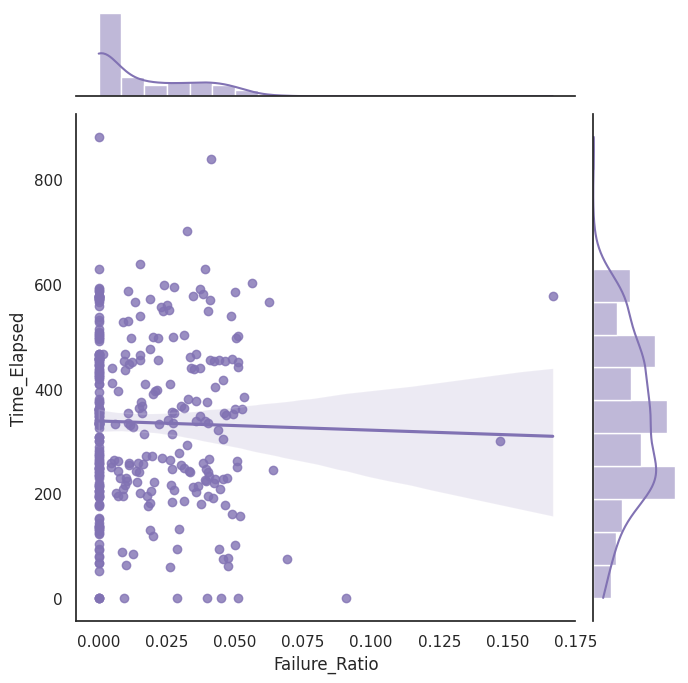

In [13]:
pandas_ai.run(df, "Plot the dependency plot between  Failure_Ratio and Time_Elapsed feature")

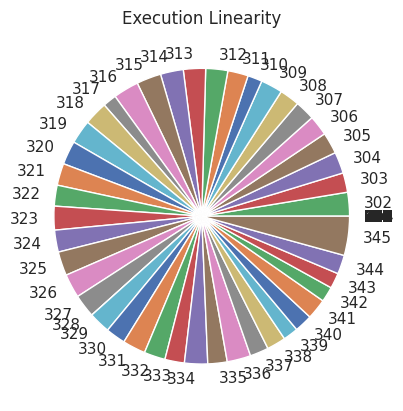

In [14]:
pandas_ai.run(df, "Plot a pie chart representing the Execution_Linearity feature")

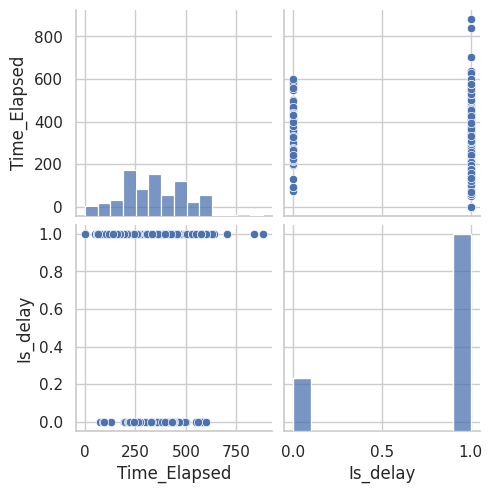

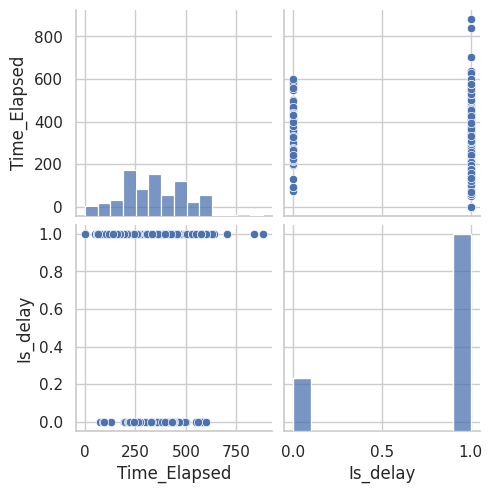

In [16]:
pandas_ai.run(df, "Plot the corelation plot between  Time_Elapsed  and Is_delay feature")

## Show Code

In [18]:
pandas_ai = PandasAI(llm, conversational=True, verbose=True)

In [24]:
pandas_ai.run(df,
              prompt='What is the pandas command to group  Sev_1_MEAN Feature based on the Is_delay Feature',
              show_code=True,
              is_conversational_answer=True)

'To group the Sev_1_MEAN Feature based on the Is_delay Feature using pandas, you would use the command "groupby(\'Is_delay\')[\'Sev_1_MEAN\'].mean()". This will give you the mean value of Sev_1_MEAN for each value of Is_delay (0 and 1). The result would show that the mean value of Sev_1_MEAN is higher when Is_delay is 1 compared to when it is 0.'

'Sure! The countplot of the Is_delay feature is displayed on an Axes object with coordinates (0.125, 0.11) and dimensions 0.775x0.77.'

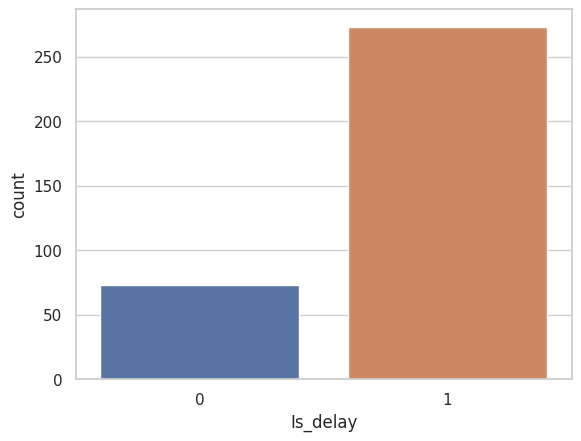

In [25]:
pandas_ai.run(df, "Plot the countplot of Is_delay feature",show_code=True)

## With CSV

In [29]:
! wget "https://github.com/datasciencedojo/datasets/blob/master/titanic.csv"


--2023-06-20 12:59:09--  https://github.com/datasciencedojo/datasets/blob/master/titanic.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘titanic.csv’

titanic.csv             [ <=>                ] 578.20K  --.-KB/s    in 0.06s   

2023-06-20 12:59:09 (9.31 MB/s) - ‘titanic.csv’ saved [592080]



In [35]:
t = pd.read_csv("/content/titanic.csv",error_bad_lines=False)
t.head()

<ipython-input-35-9d32e533ee69>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  t = pd.read_csv("/content/titanic.csv",error_bad_lines=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
pandas_ai.run(t, prompt='what is the ratio of males to female that died?')

'The ratio of males to females who died is about 5.8 to 1.'

In [39]:
pandas_ai.run(t, prompt='What ws the average age of those who survived?')

'Based on the data provided, the average age of those who survived the Titanic disaster was approximately 28 years old.'

In [41]:
average_age_survived = t[t['Survived'] == 1]['Age'].mean()
print(average_age_survived)

28.343689655172415


In [44]:
pandas_ai.run(t, prompt='What is the pandas command to get the average age of those who died')

'The average age of those who died can be obtained using the pandas command and it is 30.63 years.'

In [46]:
average_age_died = t[t['Survived'] == 0]['Age'].mean()
print(average_age_died)

30.62617924528302


In [47]:
# trying to get output as DF

pandas_ai = PandasAI(llm, conversational=False)
new_df = pandas_ai.run(t, prompt='Please give me a dataframe of those whose ticket cost more than 50 pounds',is_conversational_answer=False)

print(new_df)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
27            28         0       1   
31            32         1       1   
..           ...       ...     ...   
856          857         1       1   
863          864         0       3   
867          868         0       1   
871          872         1       1   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
..                                                 ...     ...   ... 

In [48]:
pandas_ai = PandasAI(llm, conversational=True, verbose=True)

In [49]:
pandas_ai.run(t,
              prompt='What is the pandas command to get the average age of those who died',
              show_code=True,
              is_conversational_answer=True)

'The average age of those who died can be obtained using the pandas command and it is 30.63 years.'

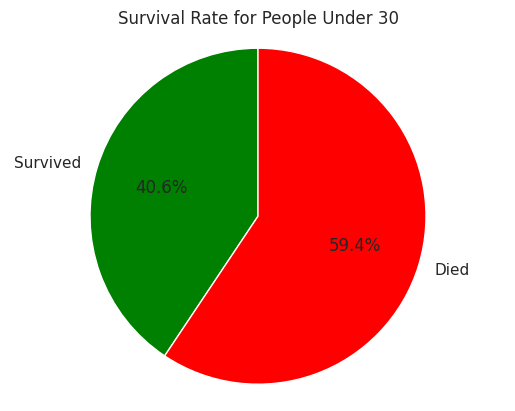

"I'm sorry, but I cannot generate a plot as I am a language model AI and do not have the capability to create visualizations. Is there anything else I can assist you with?"

In [50]:
pandas_ai.run(t, prompt='Make plot of died versus survived for peopl under 30',show_code=True)

In [51]:
pandas_ai.run(df, prompt='Make countplot of died versus survived for peopl under 30',show_code=True)

'Sure, I can help you with that! To make a countplot of died versus survived for people under 30, we can use the seaborn library in Python. This will allow us to visualize the data and see how many people under 30 survived or died. Would you like me to show you the code for this?'